In [114]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

In [4]:
def parseFile(filename):
    contents = []
    with open(filename) as f:
        for line in f:
            contents.append([int(item) for item in line.strip('\n').split()])
    return contents

In [5]:
train3file = 'train3.txt'
train5file = 'train5.txt'
test3file = 'test3.txt'
test5file = 'test5.txt'

In [25]:
train3 = parseFile(train3file)
train5 = parseFile(train5file)
test3 = parseFile(test3file)
test5 = parseFile(test5file)

In [26]:
ytrain3 = [0] * len(train3)
ytrain5 = [1] * len(train5)
ytest3 = [0] * len(test3)
ytest5 = [1] * len(test5)

train3.extend(train5)
test3.extend(test5)
ytrain3.extend(ytrain5)
ytest3.extend(ytest5)

x_train = train3
x_test = test3
y_train = ytrain3
y_test = ytest3

In [20]:
def listToNparray(listOfList):
    return np.array([np.array(xi) for xi in listOfList])

In [31]:
x_train = listToNparray(x_train)
x_test = listToNparray(x_test)
y_train = listToNparray(y_train)
y_test = listToNparray(y_test)

In [34]:
x_train, y_train = shuffle(x_train, y_train, random_state=0)
x_test, y_test = shuffle(x_test, y_test, random_state=0)

In [92]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

sigmoid_vec = np.vectorize(sigmoid)

In [110]:
def gradient(y_data, x_data, w):
    arr = y_data - sigmoid_vec(x_train.dot(w))
    return np.sum((np.expand_dims(arr, axis=1) * x_data), axis=0)

In [111]:
def logLikelihood(y_data, x_data, w):
    vec_log = np.vectorize(math.log)
    sigma = sigmoid_vec(x_data.dot(w))
    return np.sum(y_data * vec_log(sigma) + ((1 - y_data) * vec_log(1 - sigma)), axis = 0)

In [146]:
def percentErrorRate(y_data, x_data, w):
    sigma = sigmoid_vec(x_data.dot(w))
    sigma[sigma >= 0.5] = 1
    sigma[sigma < 0.5] = 0
    return (1 - accuracy_score(y_data, sigma)) * 100

In [139]:
lr = 0.2/len(train3)
w = np.array([random.random() for i in range(64)])

In [140]:
likelihoods = []
error_rates = []

while(True):
    error_rates.append(percentErrorRate(y_train, x_train, w))
    likelihoods.append(logLikelihood(y_train, x_train, w))
    new_w = w + (lr * gradient(y_train, x_train, w))
    if np.sum(abs(new_w - w)) < 0.000001:
        break
    w = new_w

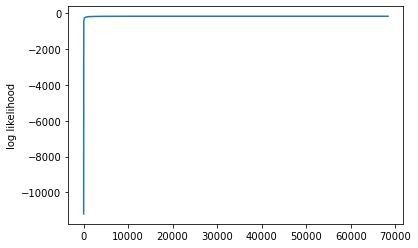

In [141]:
plt.plot(likelihoods)
plt.ylabel('log likelihood')
plt.show()

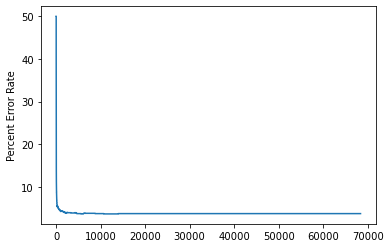

In [142]:
plt.plot(error_rates)
plt.ylabel('Percent Error Rate')
plt.show()

In [143]:
print('Training Data:')
print('Percent Error Rate: ', error_rates[-1])
print('Log Likelihood: {}', likelihoods[-1])

Training Data:
Percent Error Rate: 3.785714285714281 
Log Likelihood: -160.69474592974012


In [144]:
w.reshape((8, 8))

array([[-0.69894   , -1.79069835, -1.09593222, -1.55910935, -0.61281589,
        -1.19585413,  0.80501971,  1.98157463],
       [-0.30662466, -0.27510221,  0.33725763, -0.03486635, -0.70225478,
         1.00807412, -1.50060329, -1.51395157],
       [ 4.53778378,  1.39875248,  1.62982922,  0.09538458,  1.03742834,
        -2.47927927, -2.46688993, -2.94551655],
       [ 0.75360529,  0.36365432,  0.79404835, -0.36574538, -0.53219836,
        -2.81289441,  0.5334757 , -0.06481029],
       [ 0.66709125,  1.33469587,  0.11231855, -0.48299606, -0.63111966,
        -0.03003996, -0.67680811, -0.06051637],
       [ 1.3430501 , -0.30005544, -0.45764991, -0.22806255, -0.05443981,
        -1.17036269,  1.03806527, -1.89777205],
       [ 1.7596746 , -0.78112313,  1.42567803,  0.74172486,  0.5411414 ,
        -0.47610008,  0.12114978, -1.76621289],
       [ 0.74667644,  0.36042091,  0.78657701,  2.71799425,  0.4308032 ,
         0.75479189,  0.991657  , -0.63365613]])

In [147]:
print('Testing Data:')
print('Percent Error Rate: ', percentErrorRate(y_test, x_test, w))
print('Log Likelihood: ', logLikelihood(y_test, x_test, w))

Testing Data:
Percent Error Rate:  6.6250000000000036
Log Likelihood:  -127.17772193651534
